In [19]:
pip  install ISLP


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize ,
poly)


In [21]:
from ISLP import load_data
Boston=load_data('Boston')


# A) For each predictor, fit a simple linear regression model to predict the response.

In [22]:
predictors = Boston.drop('crim', axis=1)
response = Boston['crim']
coff = []

# Iterate over each predictor variable
for predictor in predictors:

    # Standardize the predictor variable
    X = StandardScaler().fit_transform(Boston[[predictor]])

    # Fit Ordinary Least Squares (OLS) regression model
    model = sm.OLS(response, sm.add_constant(X))  # Adding a constant term to X
    results = model.fit()

    # Append the coefficient for the standardized predictor to the list
    coff.append(results.params[1])

    # Print summary of the regression results
    print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           5.51e-06
Time:                        08:50:17   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6135      0.375      9.636      0.0

#based on p values we decide which response has best relationship with predictor


In [23]:
len(coff)

12

In [24]:
def abline(ax, b, m, *args, **kwargs):
  xlim = ax.get_xlim()
  ylim = [m * xlim[0] + b, m * xlim[1] + b]
  ax.plot(xlim, ylim, *args, **kwargs)

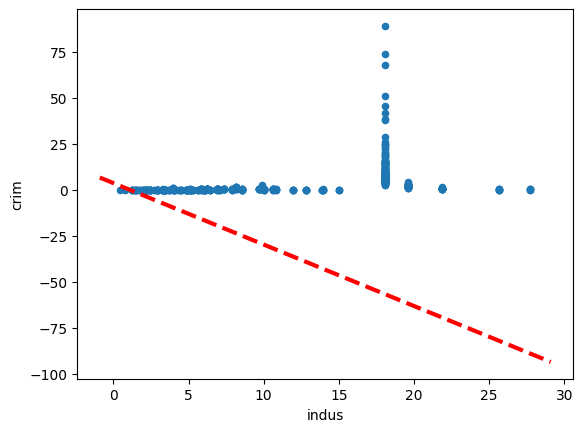

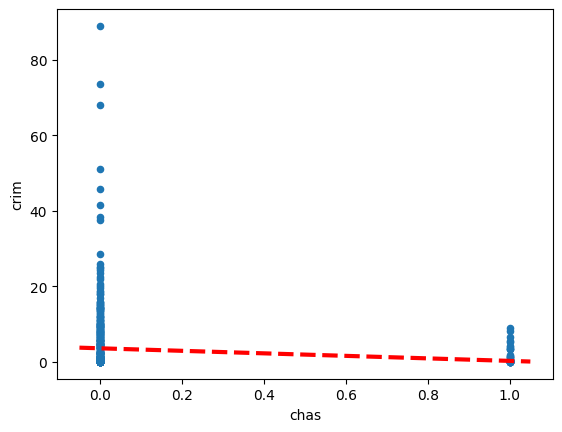

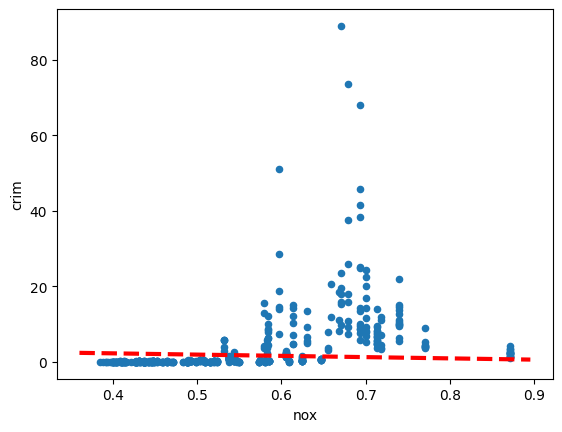

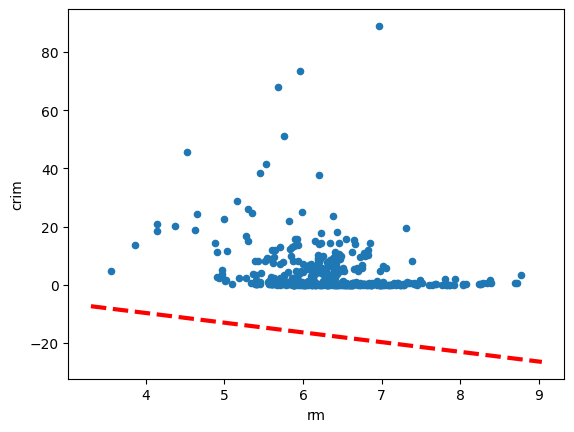

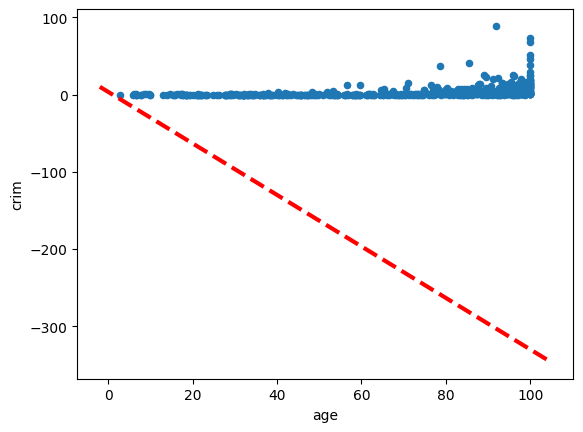

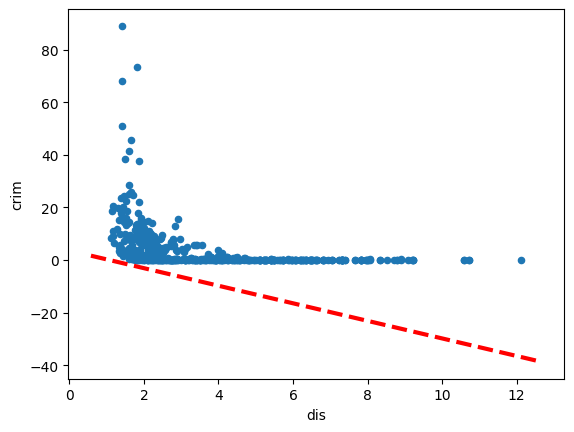

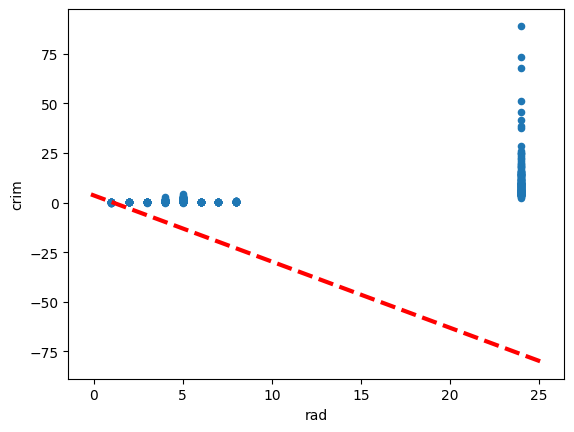

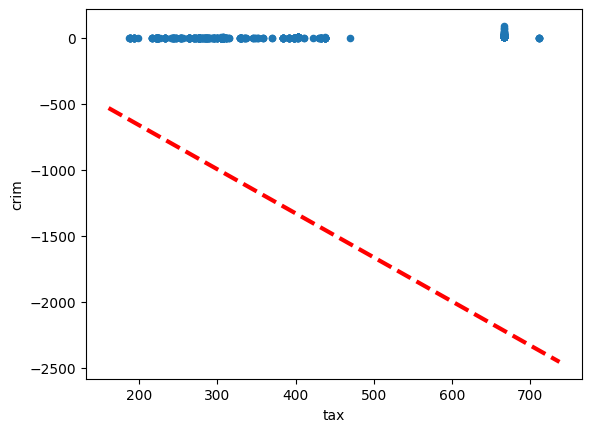

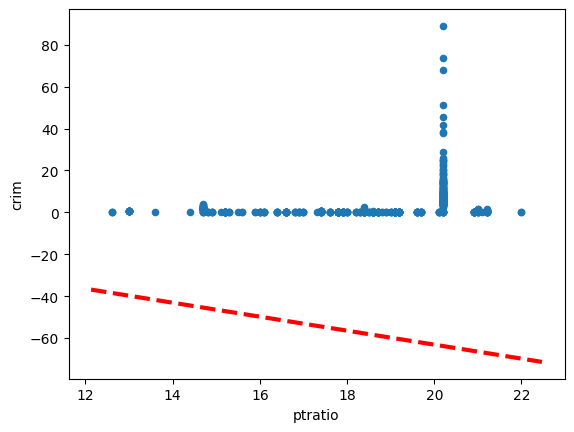

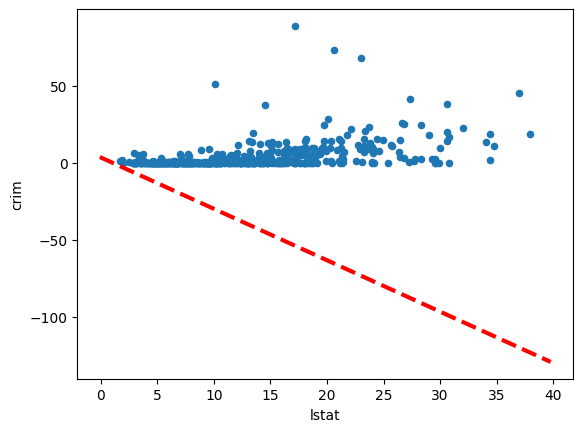

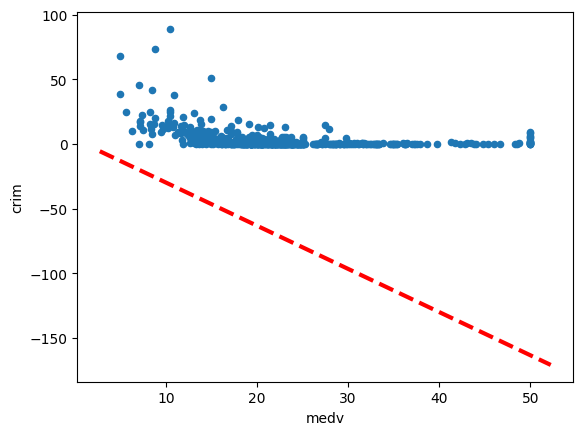

In [25]:
predictors=Boston[['indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']]
for predictor in predictors:
  ax = Boston.plot.scatter(predictor, 'crim')
  abline(ax,
  results.params[0],
  results.params[1],
  'r--',
  linewidth=3)

#B) Fit a multiple regression model to predict the response using all of the predictors.

In [36]:
X = MS(['indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv','zn']).fit_transform(Boston)
response = Boston['crim']
model1 = sm.OLS(response, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,13.7784,7.082,1.946,0.052
indus,-0.0584,0.084,-0.698,0.486
chas,-0.8254,1.183,-0.697,0.486
nox,-9.9576,5.290,-1.882,0.060
rm,0.6289,0.607,1.036,0.301
age,-0.0008,0.018,-0.047,0.962
dis,-1.0122,0.282,-3.584,0.000
rad,0.6125,0.088,6.997,0.000
tax,-0.0038,0.005,-0.730,0.466
ptratio,-0.3041,0.186,-1.632,0.103


#we can reject the null hpothesis for indus
 zn,
 dis,
 rad,
 medv

#(c) Plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis.

In [38]:
#removing intercept from both
coff2 = results1.params
coff2 = coff2[1:]
coff=coff[1:]


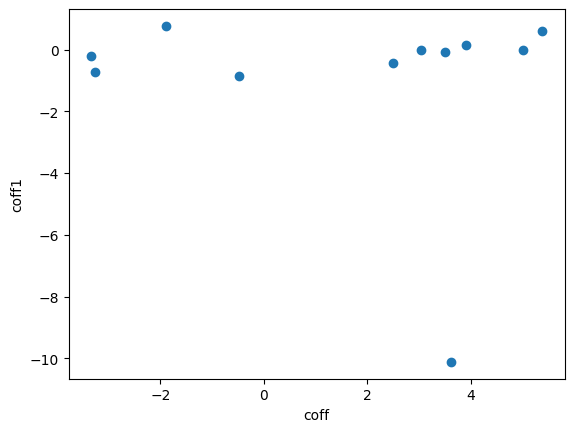

In [28]:
#plotting graph
plt.scatter(coff, coff2)
plt.xlabel("coff")
plt.ylabel("coff1")
plt.show()


#(d) Is there evidence of non-linear association between any of the predictors and the response?

In [34]:
# Create polynomial features for specified degrees to check the non linear realtion ship between predictors
X = MS([poly('age'),poly("dis", degree=3),poly("lstat", degree=4)]).fit_transform(Boston)

# Create a polynomial regression model
model3 = sm.OLS(response, X)

# Fit the model to the data
results3 = model3.fit()

# Summarize the fitted model results
summarize(results3)

,coef,std err,t,P>|t|
intercept,3.6135,0.317,11.396,0.000
"poly(age, degree=1)",-24.0969,12.706,-1.897,0.058
"poly(dis, degree=3)[0]",-64.5692,11.391,-5.668,0.000
"poly(dis, degree=3)[1]",47.4588,7.922,5.991,0.000
"poly(dis, degree=3)[2]",-32.2833,7.448,-4.334,0.000
"poly(lstat, degree=4)[0]",52.2330,9.477,5.511,0.000
"poly(lstat, degree=4)[1]",7.2226,7.592,0.951,0.342
"poly(lstat, degree=4)[2]",-3.7558,7.204,-0.521,0.602
"poly(lstat, degree=4)[3]",11.2253,7.262,1.546,0.123


on the basis of P values